In [2]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [6]:
# all the constants are in CGS units
# physical constants
sigma = 5.67051e-5 # Stefan-Boltzmann constant erg cm-2 K-4 s-1
k = 1.380658e-16 # Boltzmann constant erg k-1
m_u = 1.6605402e-24 # Atomic mass unit g
G = 6.67259e-8 # Gravitational constant cm3 g-1 s-2
h = 6.6260755e-27 # Planck constant erg s
c = 2.99792458e10 # speed of light in a vacuum cm s-1
year = 3.14e7
pc = 3.086e18

e = 4.8032068e-10 # Electron charge esu
m_e = 9.1093897e-28 # Mass of electron g
# distance
au = 1.496e13

# earth
r_earth = 6.378e8 # cm
m_earth = 5.974e27 # g
m_j_r = 317.89

# sun
m_sun = 1.99e33
L_sun = 3.9e33 # Solar luminosity erg s-1

# Exercise 3

In [37]:
sun_data = np.loadtxt('solar_standard_model-vinyoles.txt')
sun_data[0, :]
# cols::[Mass,Radius,Temp,Rho,Pres,Lumi,H1,He4,He3,C12,C13,N14,N15,O16,O17,O18,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni] 

array([1.0000e-07, 5.0000e-04, 1.5600e+07, 1.5080e+02, 2.3140e+17,
       0.0000e+00, 3.4715e-01, 6.3281e-01, 8.0470e-06, 1.0290e-05,
       2.3400e-06, 4.8860e-03, 9.9320e-08, 8.5400e-03, 5.9040e-04,
       2.1910e-05, 2.0450e-03, 4.0070e-05, 7.7080e-04, 6.9550e-05,
       8.5060e-04, 7.2820e-06, 4.2390e-04, 9.3520e-06, 7.6060e-05,
       4.2990e-06, 7.4840e-05, 5.9430e-08, 4.2780e-06, 4.2490e-07,
       2.1240e-05, 1.5530e-05, 1.4730e-03, 4.0890e-06, 8.7060e-05])

In [38]:
m = sun_data[:, 0]
r = sun_data[:, 1]
T = sun_data[:, 2]
rho = sun_data[:, 3]
P = sun_data[:, 4]

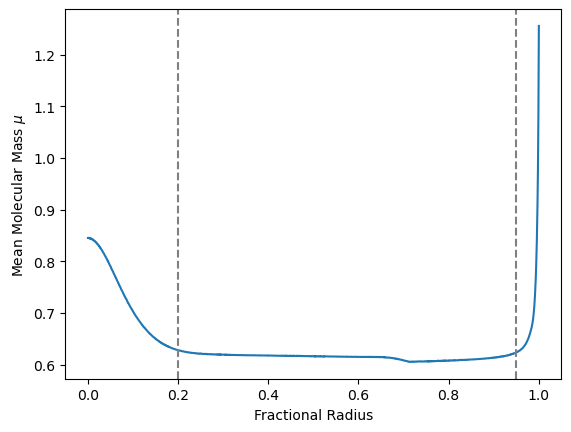

In [39]:
mu = (rho*k*T)/(P*m_u)
plt.plot(r, mu)
plt.axvline(0.2, linestyle='--', color='grey')
plt.axvline(0.95, linestyle='--', color='grey')
plt.xlabel('Fractional Radius')
plt.ylabel(r'Mean Molecular Mass $\mu$')
# plt.ylim(0.5, 1.5)
plt.savefig('mu.png', dpi=100)
plt.show()

In [40]:
logT = np.log(T)
logP = np.log(P)
dlogT = logT[1:] - logT[:-1]
dlogP = logP[1:] - logP[:-1]
nabla = dlogT/dlogP

C:\Users\huqr\AppData\Local\Temp\ipykernel_13748\1393058984.py:5: RuntimeWarning: divide by zero encountered in divide
  nabla = dlogT/dlogP
C:\Users\huqr\AppData\Local\Temp\ipykernel_13748\1393058984.py:5: RuntimeWarning: invalid value encountered in divide
  nabla = dlogT/dlogP


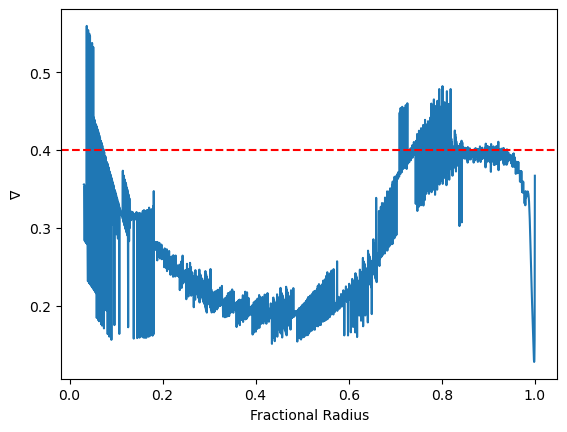

In [41]:
plt.axhline(2/5, linestyle='--', color='r', zorder=2)
plt.plot(r[61:], nabla[60:], zorder=1)

plt.xlabel('Fractional Radius')
plt.ylabel(r'$\nabla$')
plt.savefig('nabla.png', dpi=100)
plt.show()

# Exercise 5

In [3]:
Ls = np.array([1e-8, 1e-7, 1e-6])
labels=[8, 7, 6]

In [4]:
m_tot = np.arange(1, 100, 0.1)
mu = 2.29

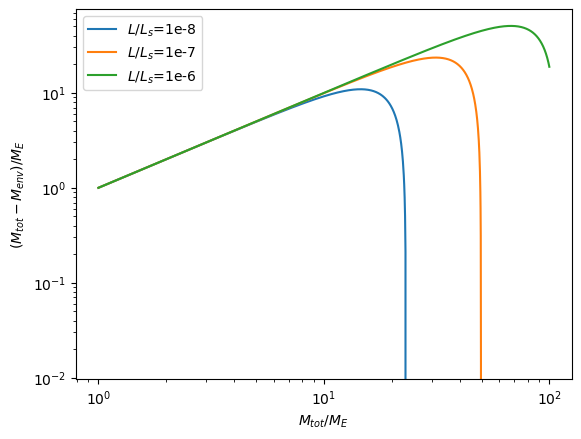

In [12]:
fig = plt.figure()
ax  = fig.add_subplot(111)
for i,L in enumerate(Ls):
    W = 3*1*L*L_sun/(64*np.pi*sigma)
    delta = m_tot - 4*np.pi*7/W * ((G*m_tot*m_earth*mu*m_u)/(4*k))**4 / m_earth
    # B = 4*np.pi*7/W * ((G*m_earth*mu*m_u)/(4*k))**4
    # c = (1/4/B)**(1/3)/m_earth
    # ax.axvline(np.log10(c))
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.plot(m_tot, delta, label=r'$L/L_s$=1e-'+str(labels[i]))
ax.legend()
ax.set_ylabel(r"$(M_{tot} - M_{env}) / M_E$")
ax.set_xlabel(r"$M_{tot} / M_E$")
plt.savefig('e5.png', dpi=100)
plt.show()